In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score, mean_absolute_error, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Conclusiones
Los modelos de regresión tendieron en general a subajustar bastante, con puntajes de R2 que no superaban el valor de 0.4, y aquellos modelos con el mejor puntaje pasaban a sobreajustar excesivamente. Los modelos de clasificación tuvieron mejor desempeño, el que mejores puntajes de error obtuvo fue el estimador de Random Forest. El F1 score de este modelo para el set de entrenamiento y prueba fue de 0.98 y 0.71 dividiendo la calidad en tres clases, que representa algo de sobreajuste en el modelo, pero obtiene una buena capacidad de predicción comparado a otros modelos.  

## Vino Rojo

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop(columns='quality')
sc = StandardScaler()
X = sc.fit_transform(X)
y = df.quality

In [4]:
y_list = [['Calidad con todos los valores', y],
          ['Calidad con 2 clases', pd.cut(y, bins=[0, 5.5, 10], labels=[0, 1])],
          ['Calidad con 3 clases uniforme', pd.cut(y, bins=[0, 4.5, 6.5, 10], labels=[0, 1, 2])],
          ['Calidad con 3 clases no uniforme', pd.cut(y, bins=[0, 5.5, 6.5, 10], labels=[0, 1, 2])],
          ['Calidad con 4 clases', pd.cut(y, bins=[0, 4.5, 5.5, 6.5, 10], labels=[0, 1, 2, 3])]
         ]

Mejores hiperparámetros para el `Random Forest`

In [22]:
best_max_depth = 50
best_min_samples_leaf = 4
best_n_estimators = 39
best_y = y_list[3][1]
label = y_list[3][0]

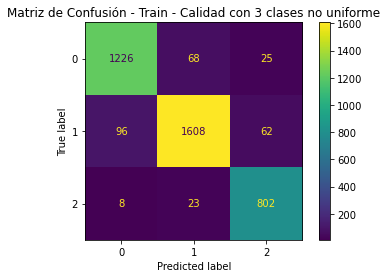

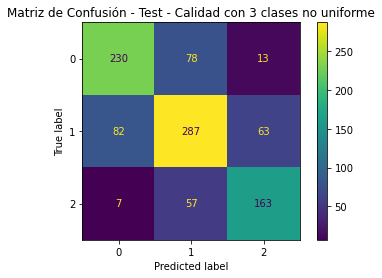

Wall time: 1.94 s


In [23]:
%%time
list_best_forest = []

X_train, X_test, y_train, y_test = train_test_split(X, best_y, test_size=0.2, random_state=42)

best_forest = RandomForestClassifier(class_weight='balanced', 
                                     max_depth=best_max_depth, 
                                     min_samples_leaf=best_min_samples_leaf, 
                                     n_estimators=best_n_estimators)

best_forest.fit(X_train, y_train)
title_train = "Matriz de Confusión - Train - {}".format(label)
disp_train = plot_confusion_matrix(best_forest, X_train, y_train)
disp_train.ax_.set_title(title_train)
plt.show()
title_test = "Matriz de Confusión - Test - {}".format(label)
disp_test = plot_confusion_matrix(best_forest, X_test, y_test)
disp_test.ax_.set_title(title_test)
plt.show()
list_best_forest.append([label, 
               f1_score(y_train, best_forest.predict(X_train), average='macro'),
               f1_score(y_test, best_forest.predict(X_test), average='macro'),
               accuracy_score(y_train, best_forest.predict(X_train)),
               accuracy_score(y_test, best_forest.predict(X_test)),
               f1_score(y_train, best_forest.predict(X_train), average=None),
               f1_score(y_test, best_forest.predict(X_test), average=None)]
               )

In [24]:
labels_metrics_test = ['Variables', 'F1 Score Train', 'F1 Score Test','Accuracy Train','Accuracy Test','F1 Train Scores for each class', 'F1 Test Scores for each class']
df_metrics_best_forest = pd.DataFrame(list_best_forest, columns=labels_metrics_test)
df_metrics_best_forest

,Variables,F1 Score Train,F1 Score Test,Accuracy Train,Accuracy Test,F1 Train Scores for each class,F1 Test Scores for each class
0,Calidad con 3 clases no uniforme,0.928415,0.696817,0.928025,0.693878,"[0.9256323140807852, 0.9281385281385282, 0.931...","[0.71875, 0.6721311475409836, 0.6995708154506438]"


## Vino blanco

In [16]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
X = df.drop(columns='quality')
sc = StandardScaler()
X = sc.fit_transform(X)
y = df.quality

In [18]:
y_list = [['Calidad con todos los valores', y],
          ['Calidad con 2 clases', pd.cut(y, bins=[0, 5.5, 10], labels=[0, 1])],
          ['Calidad con 3 clases uniforme', pd.cut(y, bins=[0, 4.5, 6.5, 10], labels=[0, 1, 2])],
          ['Calidad con 3 clases no uniforme', pd.cut(y, bins=[0, 5.5, 6.5, 10], labels=[0, 1, 2])],
          ['Calidad con 4 clases', pd.cut(y, bins=[0, 4.5, 5.5, 6.5, 10], labels=[0, 1, 2, 3])]
         ]
y_list[0][1] = y_list[0][1].map({3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:8})

In [25]:
best_max_depth = 50
best_min_samples_leaf = 2
best_n_estimators = 87
best_y = y_list[3][1]
label = y_list[3][0]

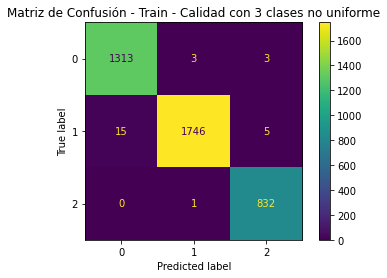

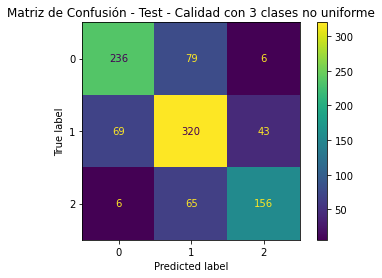

Wall time: 2.07 s


In [26]:
%%time
list_best_forest = []

X_train, X_test, y_train, y_test = train_test_split(X, best_y, test_size=0.2, random_state=42)

best_forest = RandomForestClassifier(class_weight='balanced', 
                                     max_depth=best_max_depth, 
                                     min_samples_leaf=best_min_samples_leaf, 
                                     n_estimators=best_n_estimators)

best_forest.fit(X_train, y_train)
title_train = "Matriz de Confusión - Train - {}".format(label)
disp_train = plot_confusion_matrix(best_forest, X_train, y_train)
disp_train.ax_.set_title(title_train)
plt.show()
title_test = "Matriz de Confusión - Test - {}".format(label)
disp_test = plot_confusion_matrix(best_forest, X_test, y_test)
disp_test.ax_.set_title(title_test)
plt.show()
list_best_forest.append([label, 
               f1_score(y_train, best_forest.predict(X_train), average='macro'),
               f1_score(y_test, best_forest.predict(X_test), average='macro'),
               accuracy_score(y_train, best_forest.predict(X_train)),
               accuracy_score(y_test, best_forest.predict(X_test)),
               f1_score(y_train, best_forest.predict(X_train), average=None),
               f1_score(y_test, best_forest.predict(X_test), average=None)]
               )

In [27]:
labels_metrics_test = ['Variables', 'F1 Score Train', 'F1 Score Test','Accuracy Train','Accuracy Test','F1 Train Scores for each class', 'F1 Test Scores for each class']
df_metrics_best_forest = pd.DataFrame(list_best_forest, columns=labels_metrics_test)
df_metrics_best_forest

,Variables,F1 Score Train,F1 Score Test,Accuracy Train,Accuracy Test,F1 Train Scores for each class,F1 Test Scores for each class
0,Calidad con 3 clases no uniforme,0.993287,0.727781,0.993109,0.726531,"[0.9920664903664526, 0.9931740614334471, 0.994...","[0.7468354430379746, 0.7142857142857143, 0.722..."
